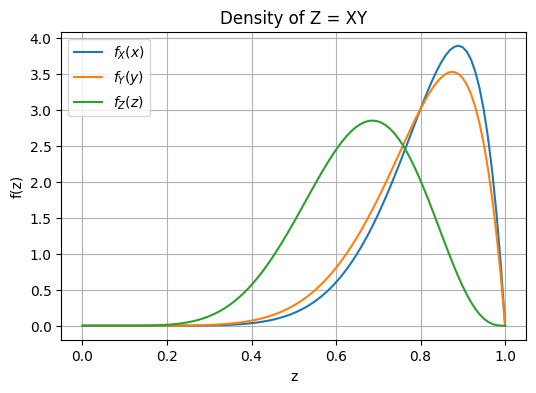

In [ ]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

a1, b1, a2, b2 = 9, 2, 8, 2
fx = lambda x: beta.pdf(x, a1, b1)
fy = lambda y: beta.pdf(y, a2, b2)

z = np.linspace(0, 1, 100)
# fz = np.zeros(len(z))
# for i in range(len(z)):
#     integrand = lambda y: fy(y) * fx(z[i]/y) / y
#     fz[i] = integrate.quad(integrand, z[i], 1)[0]

def f(z) :
    fxy = lambda y : fy(y) * fx(z/y) / y # define the integrand: inline
    tmp = integrate.quad(fxy, z, 1)
    return tmp[0]
fz = np.vectorize(f)(z) # vectorize the function f

fig = plt.figure(figsize=(6, 4))
plt.plot(z, fx(z), label='$f_X(x)$')
plt.plot(z, fy(z), label='$f_Y(y)$')
plt.plot(z, fz, label='$f_Z(z)$')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.title('Density of Z = XY')
plt.grid()
plt.legend()
plt.show()


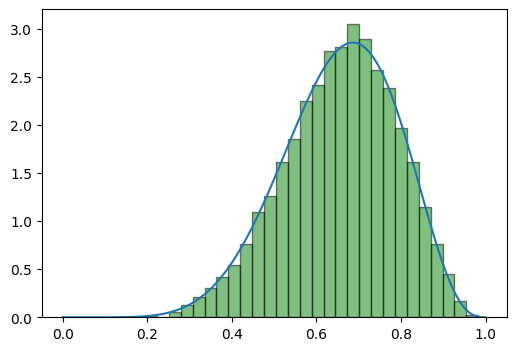

In [38]:

# simulate the samples of fz
a1, b1, a2, b2 = 9, 2, 8, 2
n = 10000
x = beta.rvs(a1, b1, size=n)
y = beta.rvs(a2, b2, size=n)
z = x * y

x = np.linspace(0, 1, 100)
def f(z) :
    fxy = lambda y : fy(y) * fx(z/y) / y # define the integrand: inline
    tmp = integrate.quad(fxy, z, 1)
    return tmp[0]
fz = np.vectorize(f)(x) # vectorize the function f

fig = plt.figure(figsize=(6, 4))
plt.plot(x, fz, label='True density')
plt.hist(z, bins=30, density=True, color='g', edgecolor='k', alpha=0.5)
plt.show()